## 1. 구글 드라이브 마운트

구글 드라이브를 마운트해야 구글 드라이브에 yolo 코드를 다운받고, 드라이브에 있는 데이터로 학습을 할 수 있음

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# 작업 경로를 MyDrive로 변경하여 구글 드라이브에 접속 후 바로 작업 디렉토리를 확인 가능
import os
print('현재 작업 경로 :', os.getcwd())
print('변경된 작업 경로 :', os.getcwd())

현재 작업 경로 : c:\Users\jjook\Documents\repository\capstone_AI
변경된 작업 경로 : c:\Users\jjook\Documents\repository\capstone_AI


## 2. YOLOv5 레퍼지토리 다운로드


In [ ]:
# 처음에 한번만 실행 !
!git clone https://github.com/ultralytics/yolov5  # YOLOv5 레퍼지토리 clone

Cloning into 'yolov5'...
remote: Enumerating objects: 16982, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 16982 (delta 90), reused 109 (delta 53), pack-reused 16805 (from 1)
Receiving objects: 100% (16982/16982), 15.72 MiB | 10.82 MiB/s, done.
Resolving deltas: 100% (11623/11623), done.
Updating files: 100% (147/147), done.


In [7]:
# 필요한 패키지 다운로드 및 임포트
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import yaml
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

c:\Users\jjook\Documents\repository\capstone_AI\yolov5


C:\Users\jjook\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Setup complete. Using torch 2.5.1+cpu (CPU)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 3. data.yaml 파일 수정

- yaml 파일 수정
  - train, val(또는 test) 데이터가 있는 경로 수정 필요




In [ ]:
# 사용할 데이터셋 경로 및 데이터셋의 yaml 파일 경로 지정
data_dir = '{path}'
data_yaml = '{path}'

In [ ]:
# 데이터셋 yaml 파일 확인
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

In [ ]:
# yaml 파일의 train, val 데이터가 있는 경로 수정 (기존 경로 -> 구글 드라이브에 저장된 경로로)
film['train'] = '{path}'
film['val'] = '{path}'

with open(data_yaml, 'w') as f:
    yaml.dump(film, f)

print('변경된 yaml 파일 :')
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

print("change complete")

# 4. YOLOv5 모델 학습
  - img: 입력 이미지 크기
  - batch: 배치 사이즈
  - epochs: 총 학습 에폭
  - data: 데이터셋 yaml 파일 경로
  - weights: 모델 웨이트 경로(pre-train된 모델로 학습시키기 때문에)
  - cache: 캐시 이미지

In [ ]:
print("test_before")
!python train.py --img 416 --batch 16 --epochs 10 --data {data_yaml} --weights yolov5s.pt --cache
print("test")

# 5. 학습한 모델 테스트

In [9]:
# 테스트 이미지 경로
test_data_dir = film['val']

# exp뒤에 숫자 확인
train_exp_num = 9

In [ ]:
!python detect.py --weights runs/train/exp9/weights/best.pt --img 416 --conf 0.1 --source {test_data_dir}

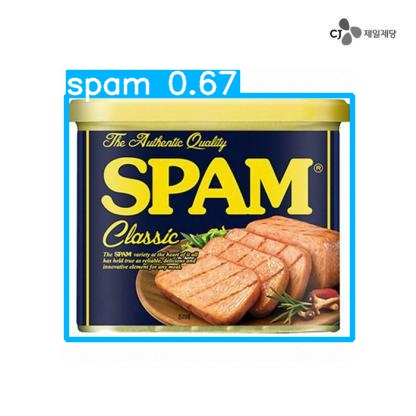

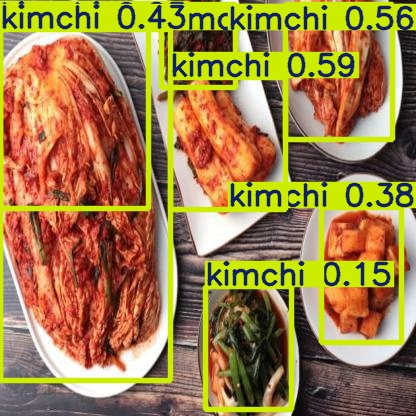

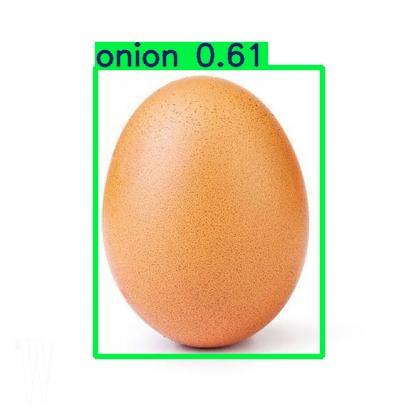

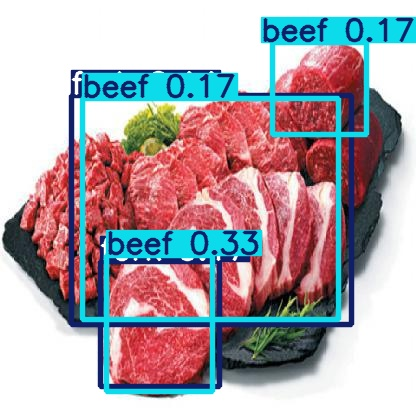

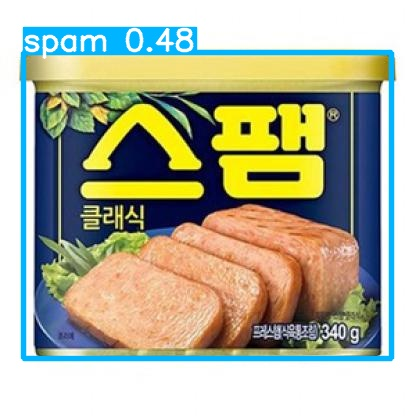

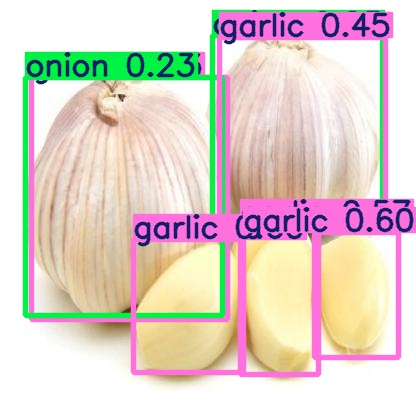

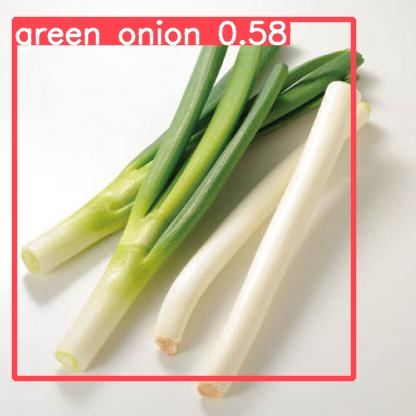

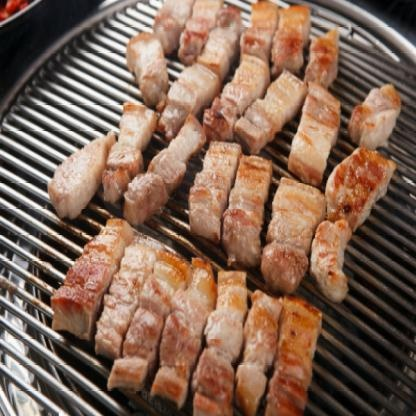

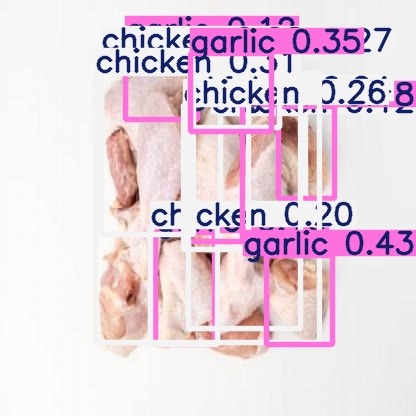

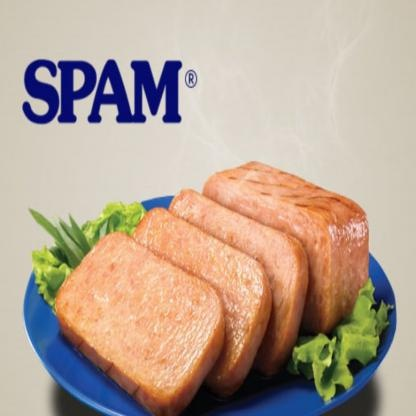

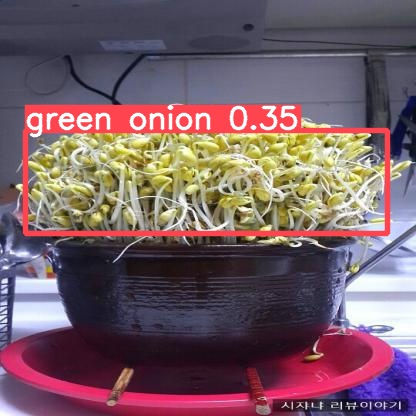

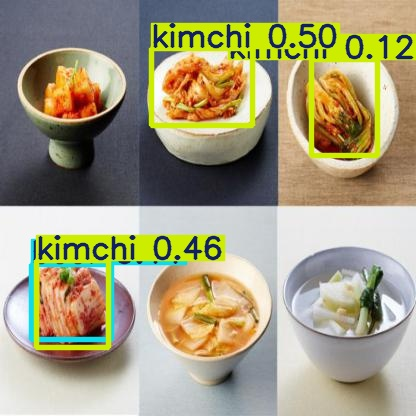

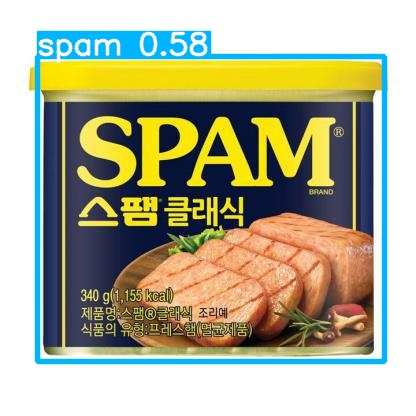

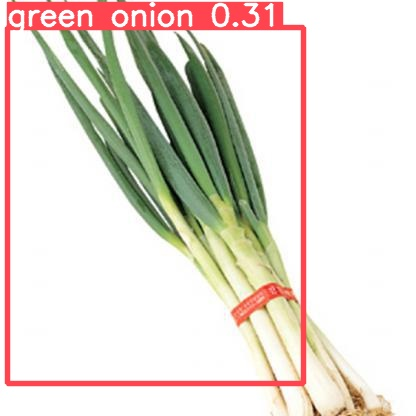

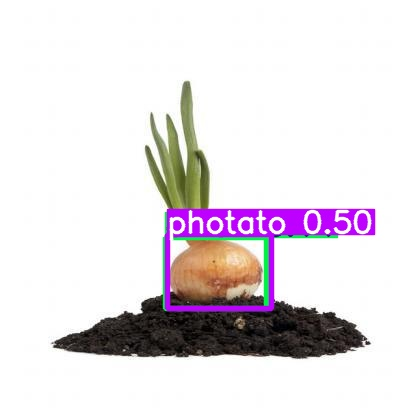

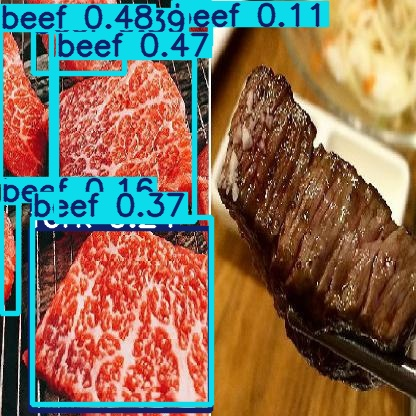

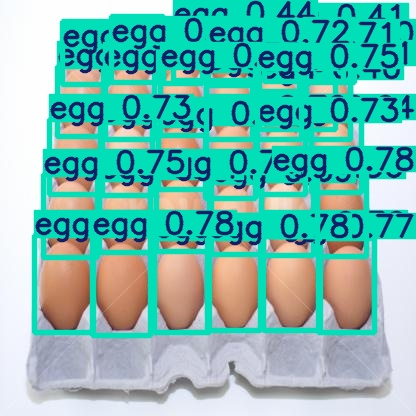

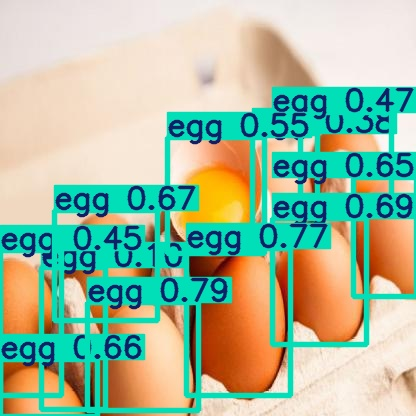

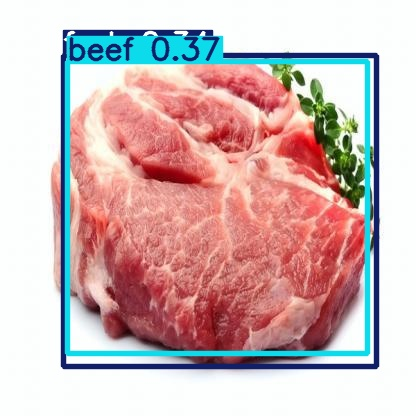

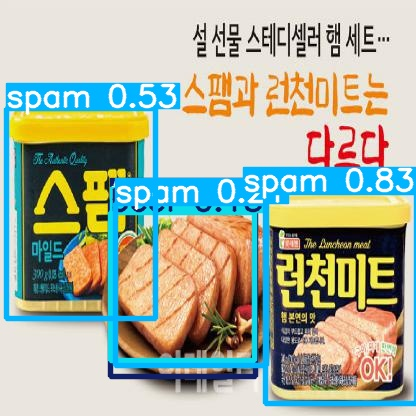

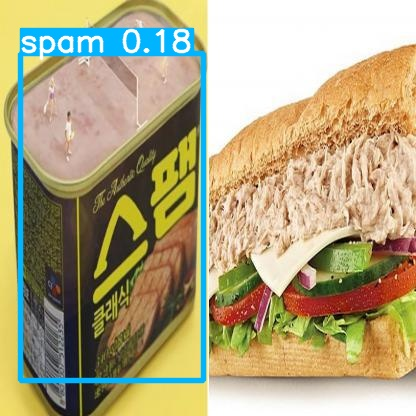

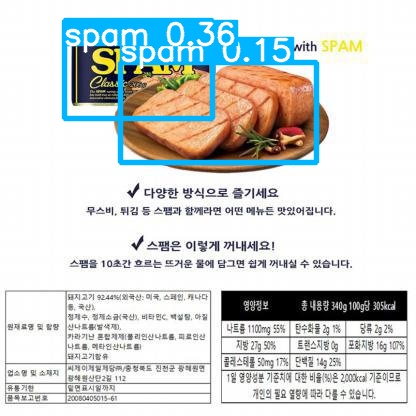

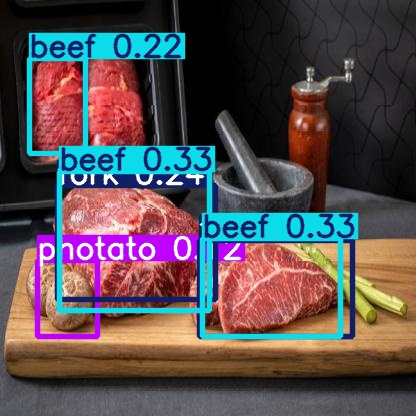

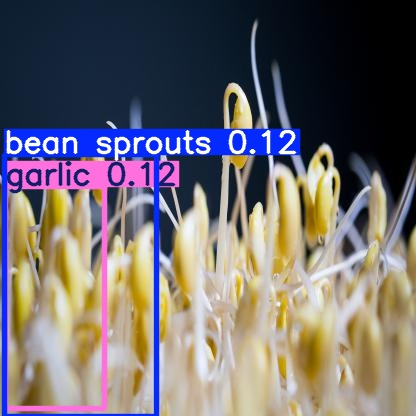

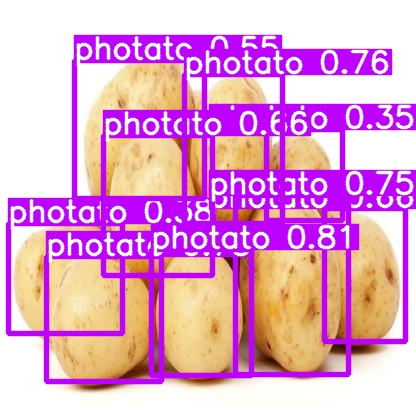

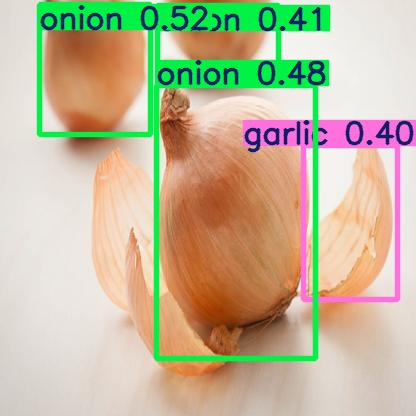

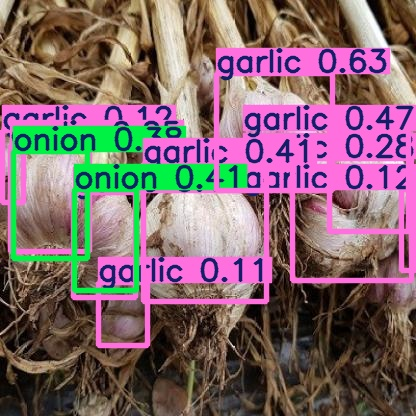

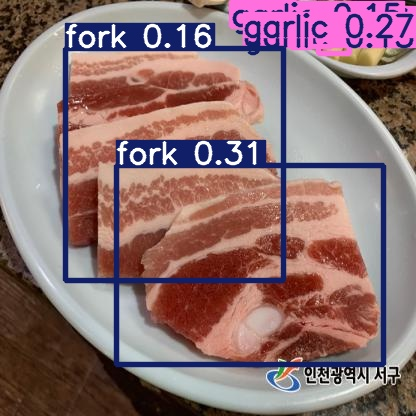

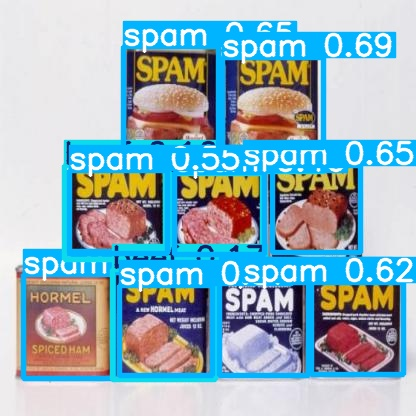

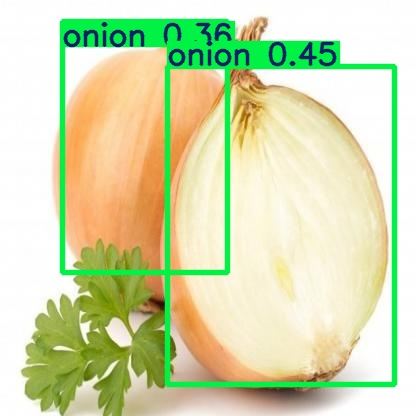

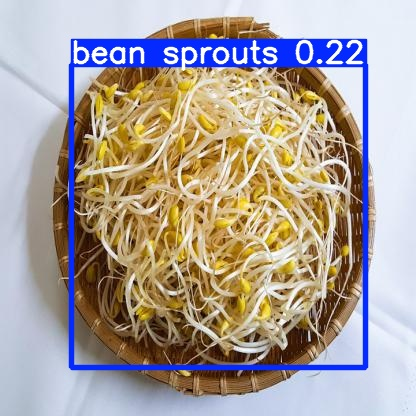

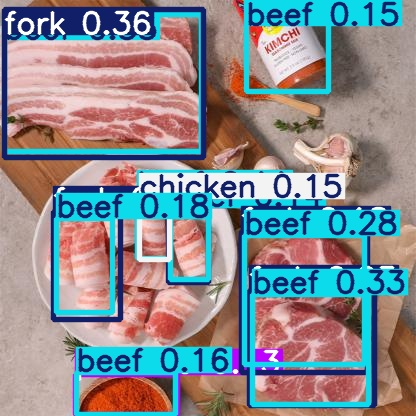

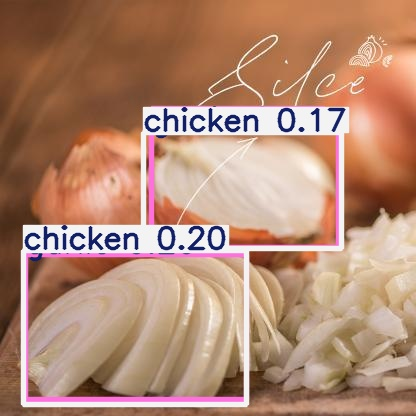

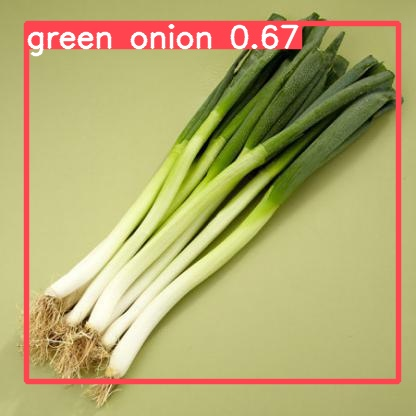

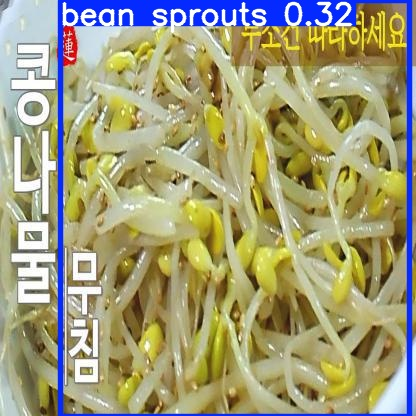

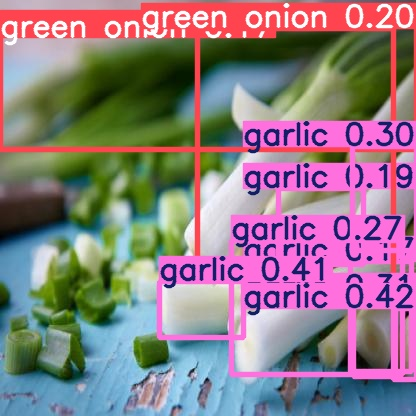

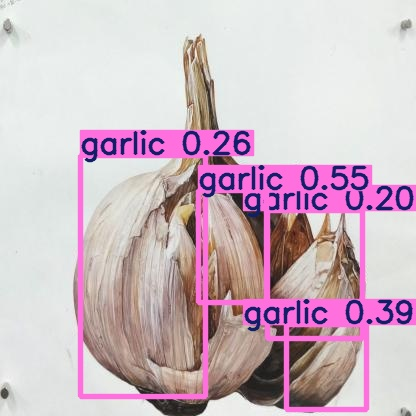

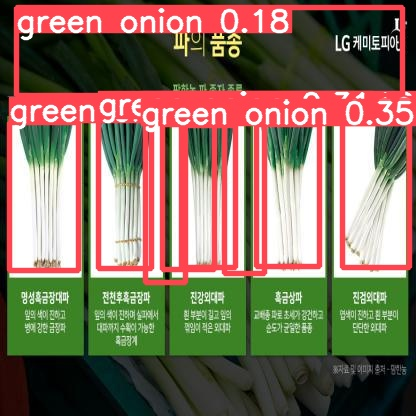

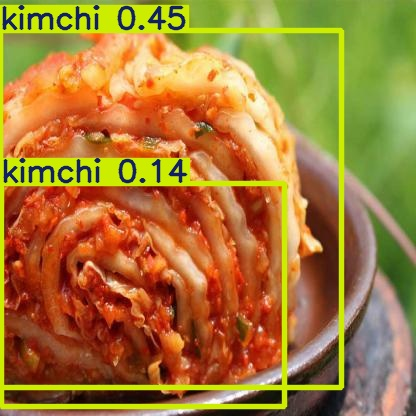

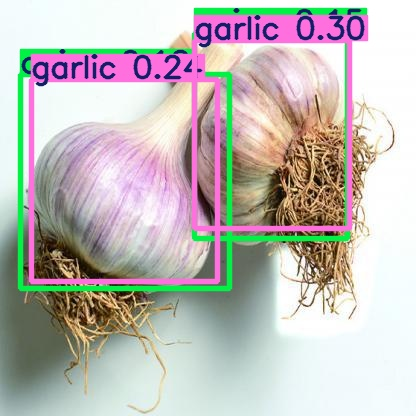

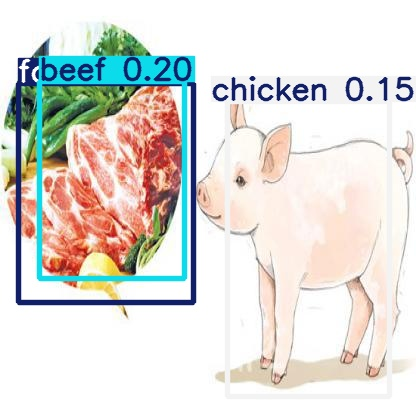

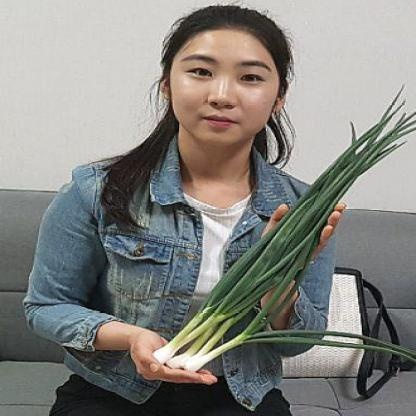

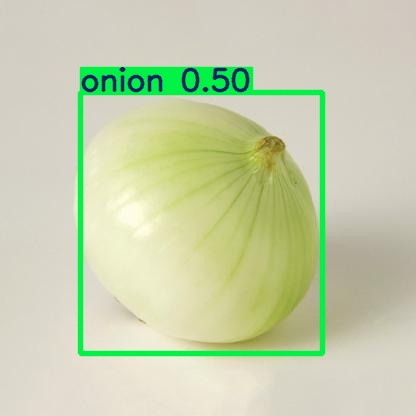

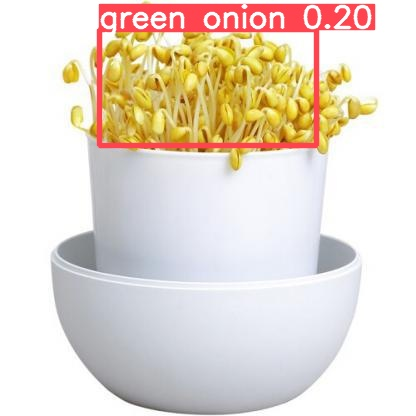

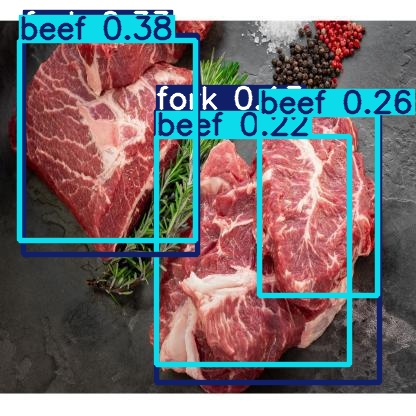

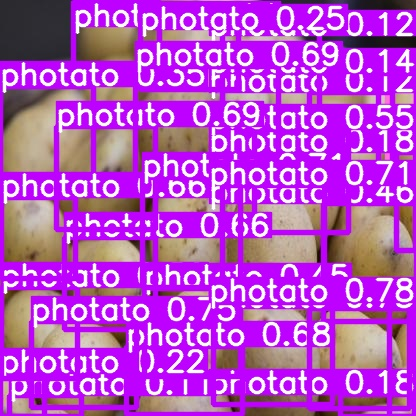

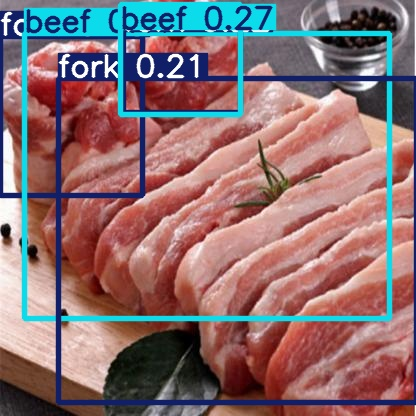

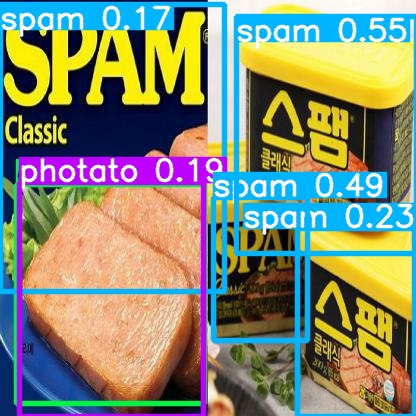

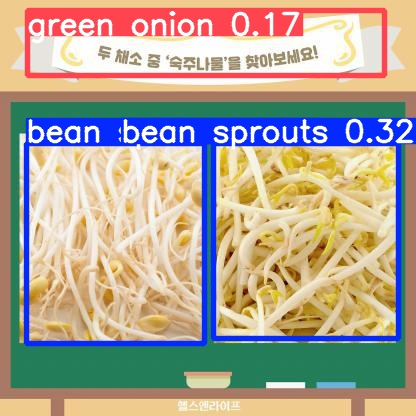

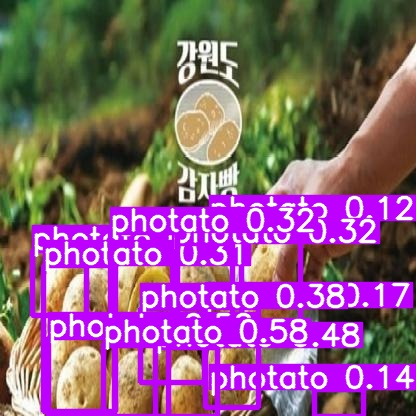

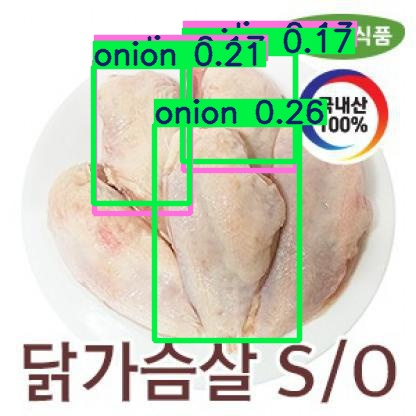

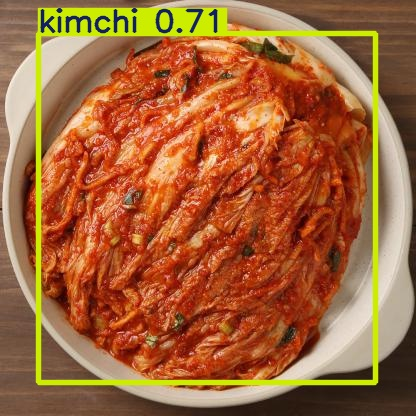

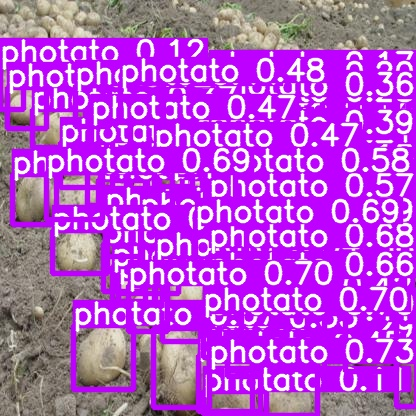

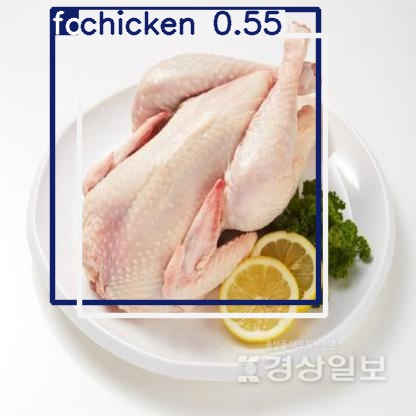

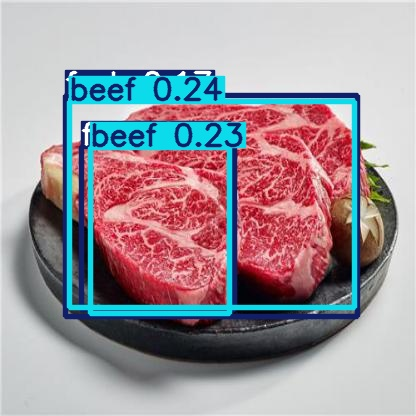

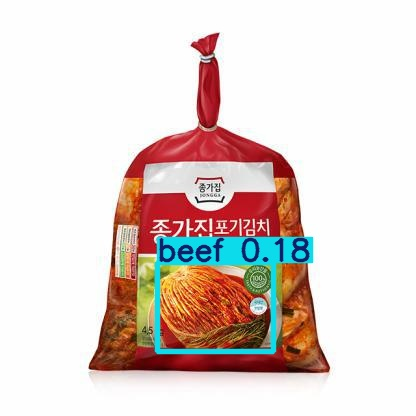

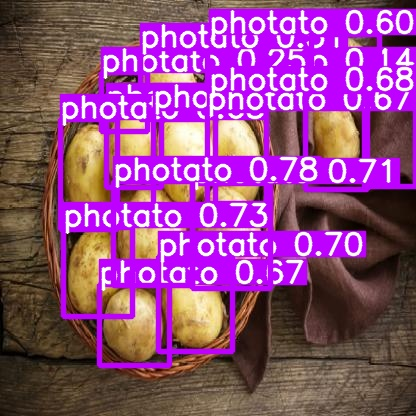

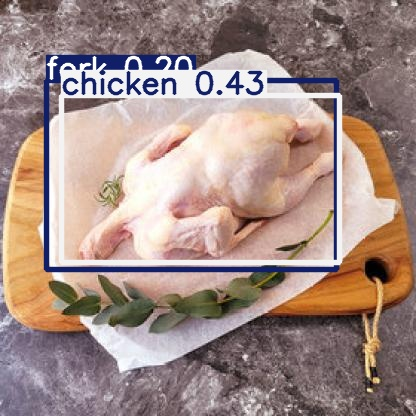

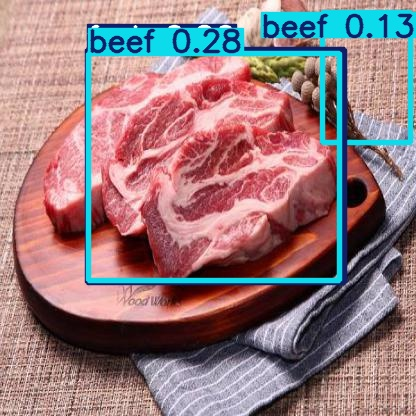

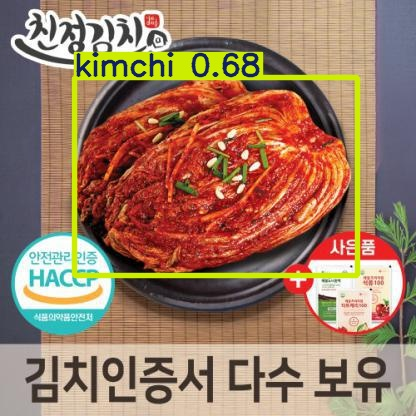

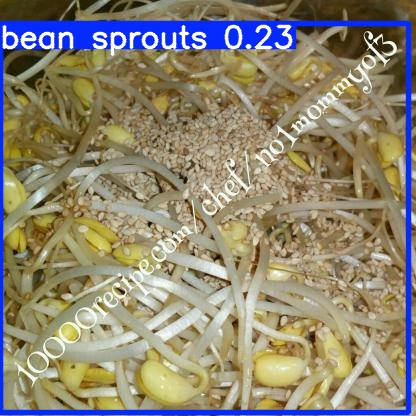

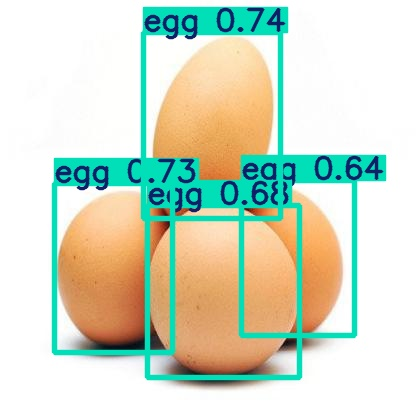

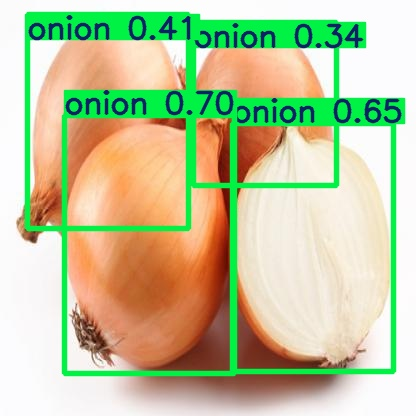

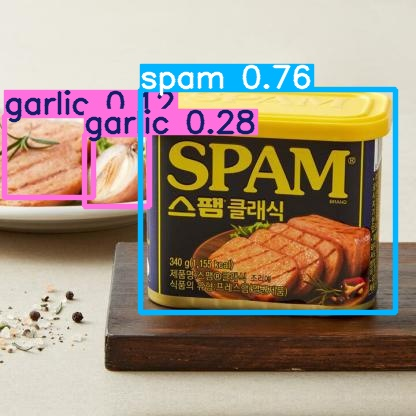

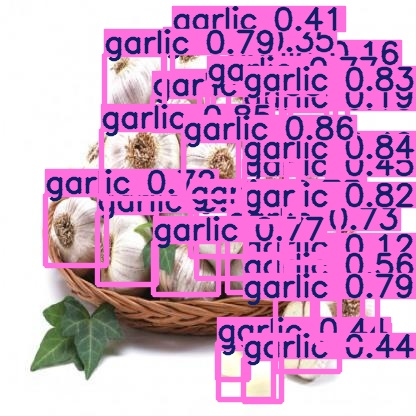

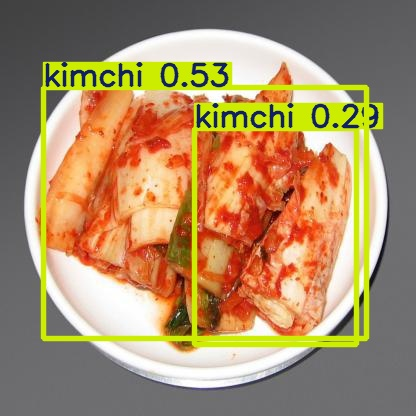

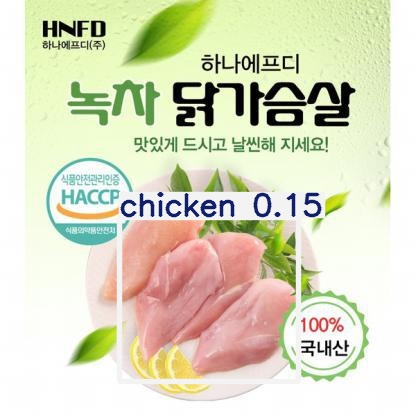

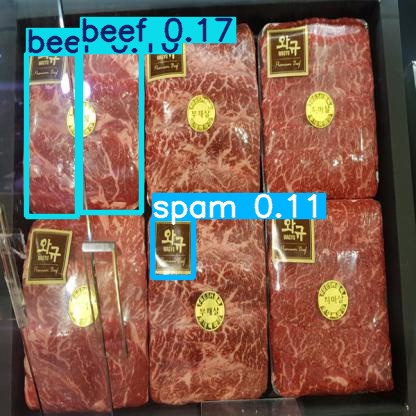

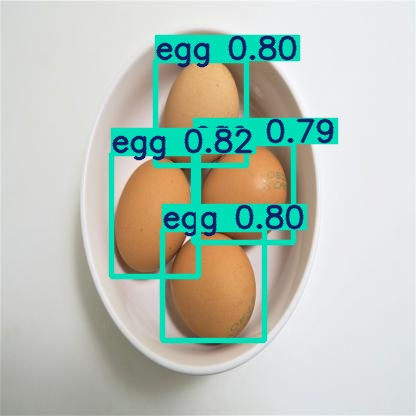

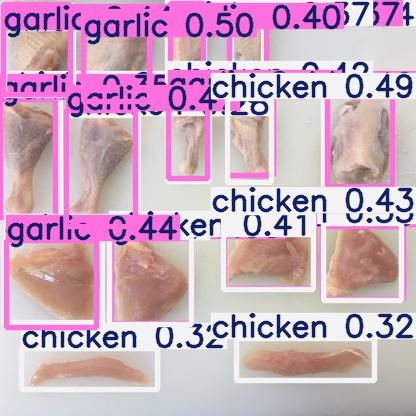

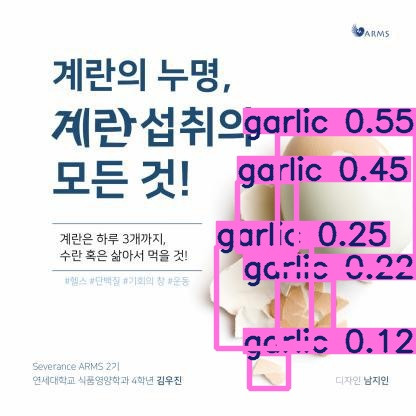

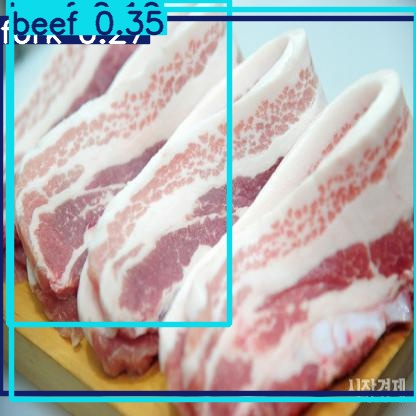

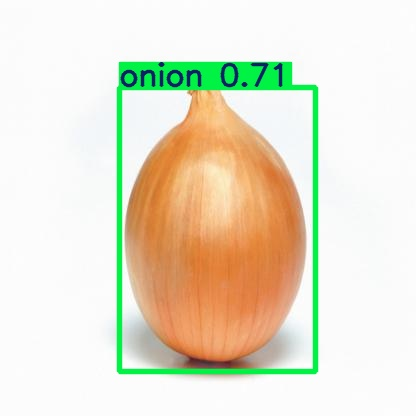

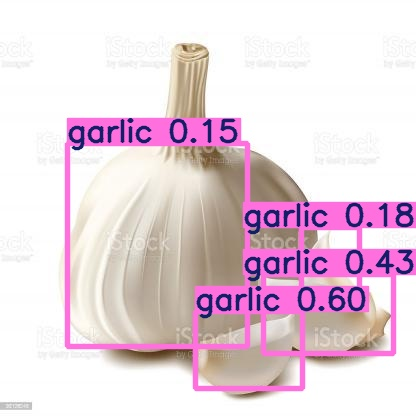

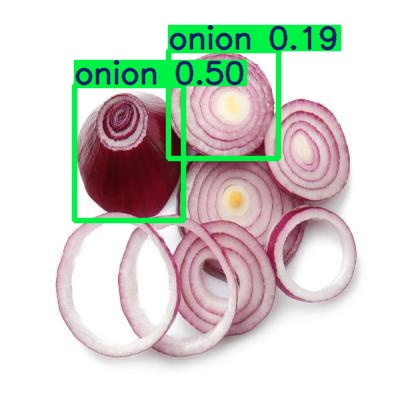

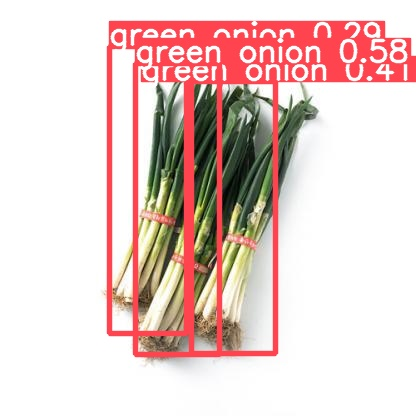

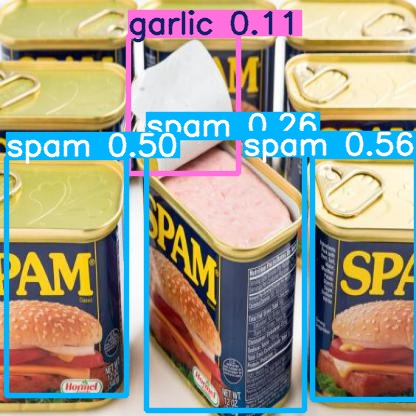

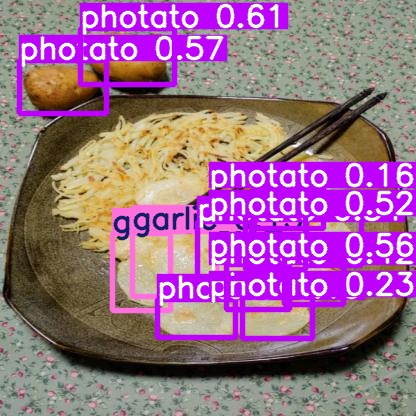

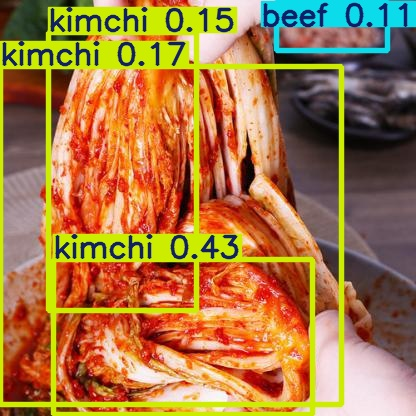

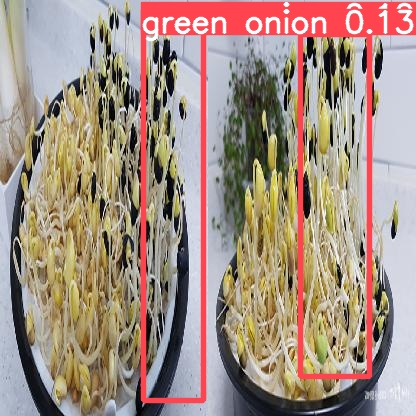

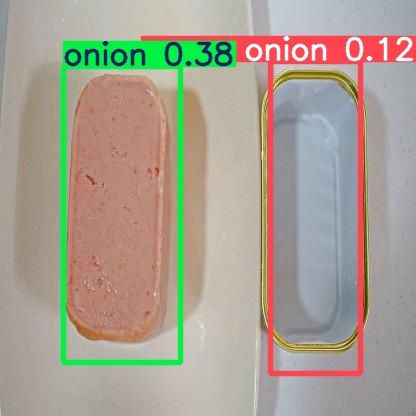

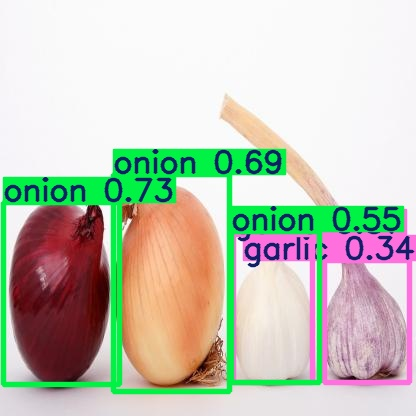

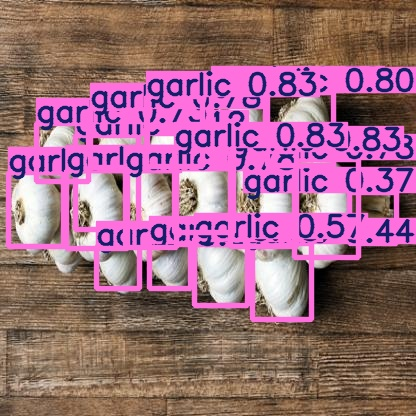

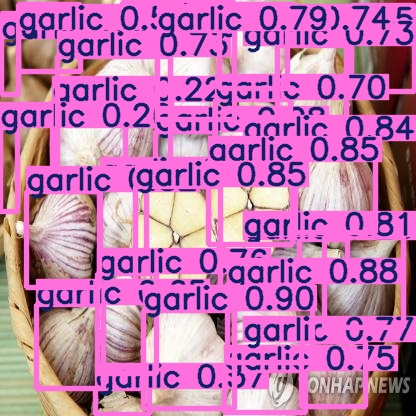

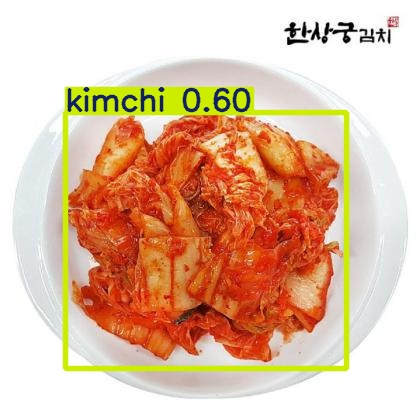

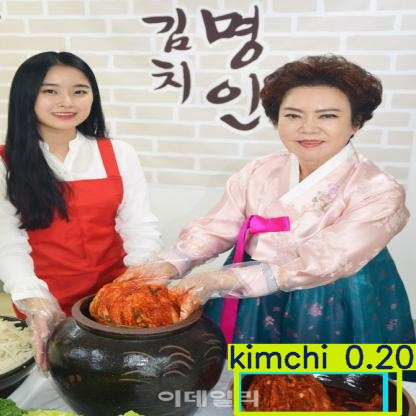

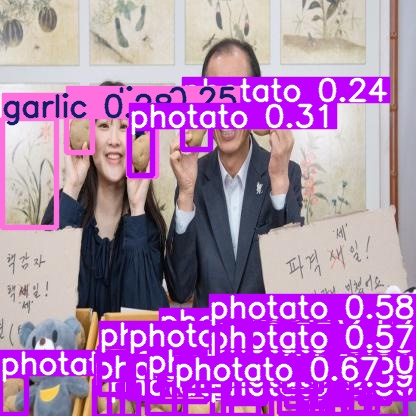

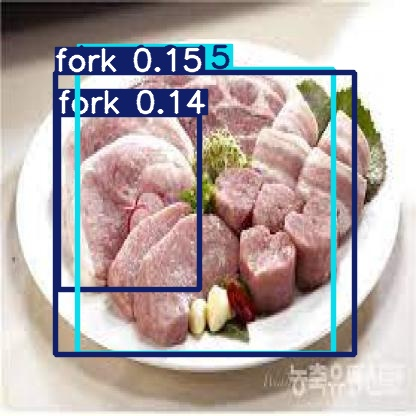

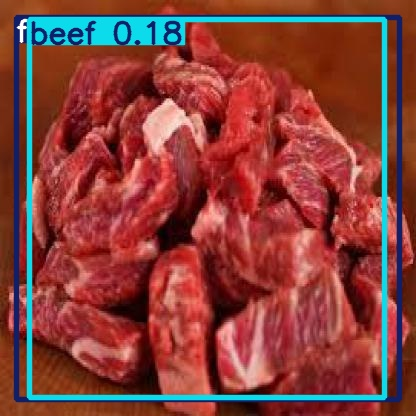

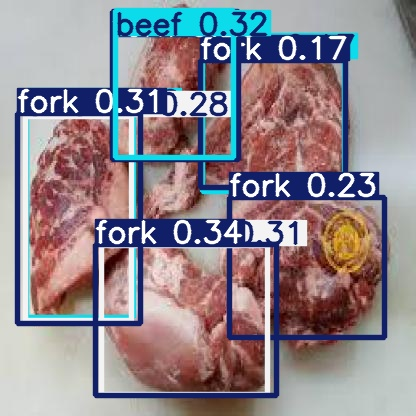

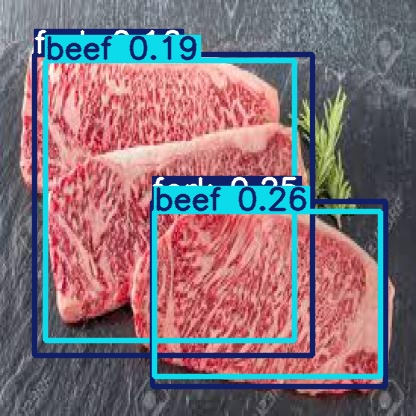

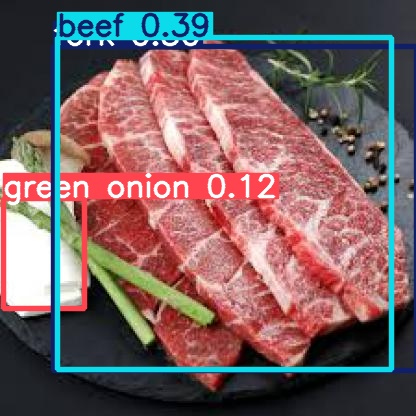

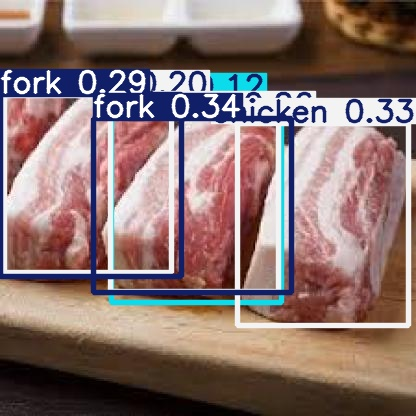

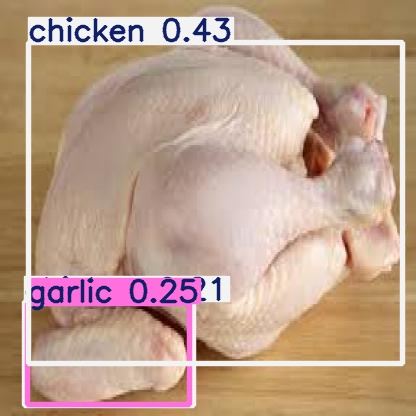

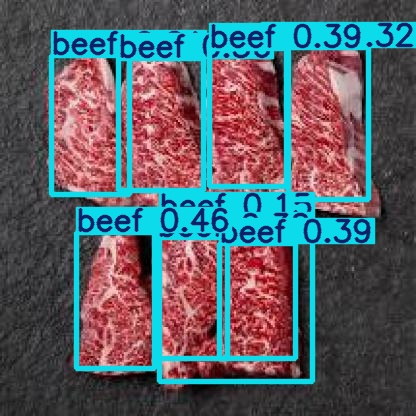

In [ ]:
# 테스트 결과 확인해보기

import glob
from IPython.display import Image, display

test_exp_num = '2'

# if not os.path.exists('/content/drive/MyDrive/yolov5/runs/detect/exp' + str(test_exp_num) + '/') :
#   raise Exception('test_exp_num 을 다시 확인하세요.')

# for imageName in glob.glob('/content/drive/MyDrive/yolov5/runs/detect/exp' + str(test_exp_num) + '/*.jpg'): #assuming JPG
#     display(Image(filename=imageName))
#     print("\n")

if not os.path.exists('{path}') :
  raise Exception('test_exp_num 을 다시 확인하세요.')

for imageName in glob.glob('{path}'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
import os
import subprocess
from IPython.display import Image, display

class_names = [
    'bean sprouts', 'beef', 'chicken', 'egg', 'fork',
    'garlic', 'green onion', 'kimchi', 'onion',
    'photato', 'spam'
]

def run_single_image_detection(image_path):
    result_dir = "runs/detect/exp8/"
    labels_dir = os.path.join(result_dir, "labels")
    predicted_image_path = os.path.join(result_dir, os.path.basename(image_path))

    print(f"Running YOLOv5 detection on: {image_path}")

    # YOLO 탐지 실행
    subprocess.run([
        "python", "detect.py",
        "--weights", "runs/train/exp9/weights/best.pt",
        "--img", "416",
        "--conf", "0.1",
        "--source", image_path,
        "--project", "runs/detect",
        "--name", "exp8",
        "--exist-ok"
    ], check=True)

    # 탐지된 이미지 출력
    if os.path.exists(predicted_image_path):
        display(Image(filename=predicted_image_path))
        print(f"Predicted Image: {predicted_image_path}\n")
    else:
        raise Exception(f"예측된 이미지가 {predicted_image_path}에 없습니다.")

    # 라벨 파일이 없으면 수동으로 생성
    labels_file = os.path.join(labels_dir, os.path.splitext(os.path.basename(image_path))[0] + ".txt")

    if not os.path.exists(labels_file):
        print("라벨 파일이 없으므로 결과에서 클래스 정보를 추출합니다.")

        # YOLO 탐지 결과에서 클래스 정보 수집
        result = subprocess.run([
            "python", "detect.py",
            "--weights", "runs/train/exp9/weights/best.pt",
            "--img", "416",
            "--conf", "0.1",
            "--source", image_path,
            "--project", "runs/detect",
            "--name", "exp8",
            "--exist-ok", "--save-txt"  # 라벨을 강제로 저장
        ], capture_output=True, text=True)

        print(result.stdout)

        # 결과에 대한 파싱을 여기서 수행 (예시로 첫 번째 클래스만 출력)
        detected_classes = [line.split()[0] for line in result.stdout.splitlines() if line.strip()]
        if detected_classes:
            class_id = int(detected_classes[0])
            predicted_class = class_names[class_id]

            # 수동으로 라벨 파일 생성
            os.makedirs(labels_dir, exist_ok=True)
            with open(labels_file, 'w') as f:
                f.write(f"{class_id} 0.5 0.5 1 1\n")  # 임시로 아무 좌표나 넣음

            print(f"Predicted Class: {predicted_class}")
            return predicted_class
        else:
            print("탐지된 클래스가 없습니다.")
            return None

    else:
        # 라벨 파일이 존재하면 클래스 정보 출력
        with open(labels_file, 'r') as f:
            class_id = int(f.readline().split()[0])
        predicted_class = class_names[class_id]
        print(f"Predicted Class: {predicted_class}")
        return predicted_class

# 테스트할 이미지 경로
image_path = "{path}"
predicted_class = run_single_image_detection(image_path)

if predicted_class:
    print(f"예측된 클래스: {predicted_class}")
else:
    print("탐지된 객체가 없습니다.")


# 라벨 파일 경로
label_file_path = '{path}'  # 이미지 이름에 맞게 수정

# 라벨 파일 읽기
with open(label_file_path, 'r') as label_file:
    lines = label_file.readlines()

# 클래스 ID를 클래스 이름으로 변환하여 set에 저장
predicted_classes_set = set()  # set 생성
for line in lines:
    class_id = int(line.split()[0])  # 클래스 ID 추출
    predicted_classes_set.add(class_names[class_id])  # 클래스 이름을 set에 추가

# 결과 출력
print("예측된 클래스:", predicted_classes_set)